# Calculating $R_0$ for a SIR model...and beyond

Here we discuss some expanded SIR models and we look at the desirability and efficacy of certain types of policy interventions. First, we have $R_0$ as the so-called basic reproductive rate. I am following [some online notes](https://web.stanford.edu/~jhj1/teachingdocs/Jones-on-R0.pdf) which must be great because they are from Stanford. 

Some questions:

- What impact does reducing $R_0$ have? 
- What measures reduce $R$?
- What costs are imposed on society by these measures?

What is $R_0$, intuitively?

$$
R_0 = \frac{\textrm{infection}}{\textrm{contact}}\frac{\textrm{contact}}{\textrm{time}}\frac{\textrm{time}}{\textrm{infection}}
$$

In the SIR model, we have:

$$
\begin{array}{ccc}
\dot{s} & = & - \beta i s\\
\dot{i} & = &  \beta i s - \nu i \\
\dot{r} & = & \nu i
\end{array}
$$

To calculate $R_0$ in a way that is more amenable to policy (at least as economics think about it), it is helpful to think about the above in terms of a discrete time framework, and in terms of the so-called _next-generation matrix_. 

$\mathbf{G}$. Generically

$$
\frac{\dot{i}}{{i}}=\beta s- \nu
$$



Another tidbit - minimize the number of people that are infected in the end...or minimize some weighted average of what is called $s_\infty$ or $d$. We can write these two things as functions of $R_0$. 

Some add-on questions:

- what if we are late to the party? 
- what technological measures can we use to do all of this? 

In [1]:
from sympy import *

Let's look at the SEIM model, where we have four equations:

$$
\begin{array}{ccc}
\dot{s} & = & - \beta i s\\
\dot{i} & = &  \beta i s - \nu i \\
\dot{r} & = & \nu i
\end{array}
$$

What does the model look like in discrete time? 

It would be :

$$
\begin{array}{ccc}
s_{t+1} & = & s_t- \beta i_t s_t\\
i_{t+1} & = & i_t +\beta i_t s_t - \nu i_t \\
r_{t+1} & = & r_t+\nu i_t
\end{array}
$$

So, note that we can write this as a transition matrix equation:

$$
\left[
\begin{array}{c}
s_{t+1} \\
i_{t+1} \\
r_{t+1}
\end{array}
\right]
=\left[
\begin{array}{ccc}
1 & -\beta s_t & 0 \\
\beta i_t & 1-\nu & 0 \\
0 & \nu & 1
\end{array}
\right]
\left[
\begin{array}{c}
s_{t} \\
i_{t} \\
r_{t}
\end{array}
\right]
$$

First, let's develop a little simulator of the system. In this case, we have:

In [2]:
import numpy as np

import matplotlib.pyplot as plt

def sirmodel(s0=.99, i0=.01, r0 =0, beta=.1, nu=.03, its=1000, tol=.005):
    
    '''Simulation of the SIR model. The model stops running when the number of infecteds 
       falls below tolerance or when the maximum iterations are reached.
       Tolerance must be less than i0 or the model will never 
       get going.'''
    
    S = []
    I = []
    R = []
    
    s = s0
    i = i0
    r = r0
    
    t=0
 
    while t<its and i> tol: 
        
        sp = s - beta*s*i
        ip = i + beta*s*i - nu*i
        rp = r + nu*i
        
        S.append(sp)
        I.append(ip)
        R.append(rp)
        
        s = sp
        i = ip
        r = rp
        
        t += 1
        
    return({'s':S, 'i':I, 'r':R})  

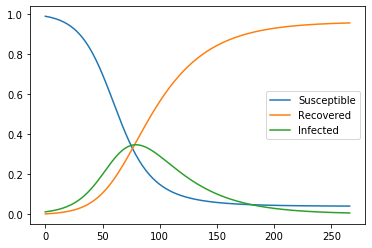

In [3]:
sim = sirmodel()
xs  = np.arange(len(sim['s']))

sline = plt.plot(xs, sim['s'])
rline = plt.plot(xs, sim['r'])
iline = plt.plot(xs, sim['i'])

legen = plt.legend(['Susceptible', 'Recovered', 'Infected'])

What does the model look like with my modification using the minimum function?

In [4]:
import numpy as np

import matplotlib.pyplot as plt

def sirmodel_min(s0=.99, i0=.01, r0 =0, beta=.1, nu=.03, its=1000, tol=.005):
    
    '''Simulation of the SIR model. The model stops running when the number of infecteds 
       falls below tolerance or when the maximum iterations are reached.
       Tolerance must be less than i0 or the model will never 
       get going.'''
    
    S = []
    I = []
    R = []
    
    s = s0
    i = i0
    r = r0
    
    t=0
 
    while t<its and i> tol: 
        
        sp = s - beta*min((s,i))
        ip = i + beta*min((s,i)) - nu*i
        rp = r + nu*i
        
        S.append(sp)
        I.append(ip)
        R.append(rp)
        
        s = sp
        i = ip
        r = rp
        
        t += 1
        
    return({'s':S, 'i':I, 'r':R})  

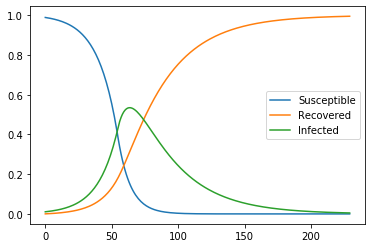

In [5]:
sim = sirmodel_min()
xs  = np.arange(len(sim['s']))

sline = plt.plot(xs, sim['s'])
rline = plt.plot(xs, sim['r'])
iline = plt.plot(xs, sim['i'])

legen = plt.legend(['Susceptible', 'Recovered', 'Infected'])

With this in mind, let's note that the model has very similar behavior to the SIR model, but is actually more aggresive in the way it models outbreaks. In any event, we can consider two regimes and a variable-time free sort of model. What would control of this model look like? 

Controlling the outbreak:
- We might suppose that we can reduce $\beta$ by some amount, so that we have: $\beta=(1-z_t)$, but also let's suppose it is not possible to reduce it too much...
- There are costs of control, but let's suppose that actually enforcing the policy isn't all that costly. It is just social costs.
- Then, the costs per unit time are:

$$
c_t = c_t (z_t)
$$

Note that what we would really want is for this to be something like $c_t(z_tn_t)$, but our population is normalized at unity. We also have the costs of immediate care of infecteds, which we will suppose is $d_t(i_t)$. This should certainly be quadratic and is a major motivation for everything!

In [7]:
import numpy as np

import matplotlib.pyplot as plt

def sirmodel_min_pol(s0=.99, i0=.01, r0 =0, beta=.1, nu=.03, z=.1, its=1000, tol=.005):
    
    '''Simulation of the SIR model. The model stops running when the number of infecteds 
       falls below tolerance or when the maximum iterations are reached.
       Tolerance must be less than i0 or the model will never 
       get going.'''
    
    S = []
    I = []
    R = []
    
    s = s0
    i = i0
    r = r0
    
    t=0
 
    while t<its and i> tol: 
        
        sp = s - beta*min((s,i))*(1-z)
        ip = i + beta*min((s,i))*(1-z) - nu*i
        rp = r + nu*i
        
        S.append(sp)
        I.append(ip)
        R.append(rp)
        
        s = sp
        i = ip
        r = rp
        
        t += 1
        
    return({'s':S, 'i':I, 'r':R})  

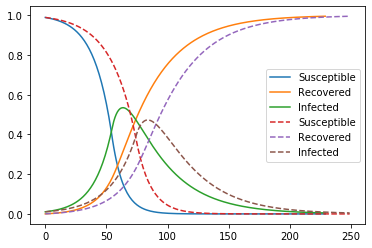

In [11]:
sim1 = sirmodel_min()
sim2 = sirmodel_min_pol(z=.2)
xs1  = np.arange(len(sim1['s']))
xs2  = np.arange(len(sim2['s']))

sline  = plt.plot(xs1, sim1['s'])
rline  = plt.plot(xs1, sim1['r'])
iline  = plt.plot(xs1, sim1['i'])
slinep = plt.plot(xs2, sim2['s'], linestyle='dashed')
rlinep = plt.plot(xs2, sim2['r'], linestyle='dashed')
ilnep  = plt.plot(xs2, sim2['i'], linestyle='dashed')

legen = plt.legend(['Susceptible', 'Recovered', 'Infected', 'Susceptible', 'Recovered', 'Infected'])

In [ ]:
sirmodel_policy

# Hamiltonian:

In the down-tick regime, we have, $s_t<i_t$, so:

$$
H_t = c_t(z_t)+d_t(i_t) + \lambda_t(s_t-\beta (1-z_t) s_t)+\mu_t(i_t+\beta (1-z_t) s_t-\nu i_t)
$$

So, the optimality conditions are:

$$
c_t'(z_t) + \lambda_t \beta s_t - \mu_t\beta s_t
$$

$$
\lambda_t = \lambda_t(1-\beta(1-z_t))+\mu_t\beta(1-z_t)
$$

$$
\mu_t = d'_t(i_t) + \mu_t(1-\nu)
$$

From the second equation, we get: $\mu_t=\frac{d_t'(i_t)}{\nu}$. Quite simply the shadow value of delay is the discounted recovery value. More interestingly, we have, from the second equation, $\lambda_t=\mu_t$. Note that when plugged into the first equation, this gives us: $c'(z_t)=0$.

Question: would discounting change this? 

What about the other side of the coin? 





Here, the Hamiltonian is:

$$
H_t = c_t(z_t)+d_t(i_t) + \lambda_t(s_t-\beta (1-z_t) i_t)+\mu_t(i_t+\beta (1-z_t) i_t-\nu i_t)
$$

With optimality conditions:

$$
c_t'(z_t) + \lambda_t \beta s_t - \mu_t\beta i_t
$$

$$
\lambda_t = \lambda_t(1-\beta(1-z_t))
$$

$$
\mu_t = d'_t(i_t) - \lambda_t\beta(1-z_t)+\mu_t(1-\nu+\beta(1-z_t))
$$

My hunch is that $\lambda_t=0$ is part of the solution; it doesn't really matter here. So, we really have a one-variable control problem. The remaining equations are:

$$
c_t'(z_t)=\mu_t\beta i_t
$$
$$
\mu_t = d'_t(i_t)+\mu_t(1-\nu+\beta(1-z_t))
$$

If we solve the second equation, we have the following:

$$
\mu_t(\nu-\beta(1-z_t)) = d'_t(i_t)
$$

So then, we have:

$$
c'_t(z_t)(\nu-\beta(1-z_t))=\beta i_td'_t(i_t)
$$

So, if costs of the policy are constant and so are the costs, we have:

$$
c(\nu-\beta+\beta z_t) = \beta d'(i_t)i_t
$$

Which in the end becomes the linear feedback rule:

$$
z_t = \frac{\beta d'(i_t)i_t}{c}+\beta - \nu
$$

In [18]:
def sirmodel_pol(s0=.99, i0=.01, r0 =0, beta=.1, z=.1, zstart=0, zend=.05, nu=.03, its=1000, tol=.005):
    
    '''Simulation of the SIR model. The model stops running when the number of infecteds 
       falls below tolerance or when the maximum iterations are reached.
       Tolerance must be less than i0 or the model will never 
       get going.'''
    
    S = []
    I = []
    R = []
    Z = []
    
    s = s0
    i = i0
    r = r0
    
    t=0
    switch = 0
    zh = 0
 
    while t < its and i > tol: 
        
        if (i>=zstart) and (switch == 0):
            zh=z
            if (i > zend):
                switch = 1
                
        if (i<=zend) and (switch == 1):
            zh=0
        
        
        sp = s - beta*s*i*(1-zh)
        ip = i + beta*s*i*(1-zh) - nu*i
        rp = r + nu*i
        
        S.append(sp)
        I.append(ip)
        R.append(rp)
        Z.append(zh)
        
        s = sp
        i = ip
        r = rp
        
        t += 1
        
    return({'s':S, 'i':I, 'r':R, 'z':Z})  

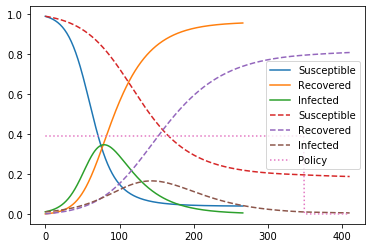

In [52]:
sim1 = sirmodel()
sim2 = sirmodel_pol(z=.39, zstart=0, zend=0.01)
xs1  = np.arange(len(sim1['s']))
xs2  = np.arange(len(sim2['s']))

sline  = plt.plot(xs1, sim1['s'])
rline  = plt.plot(xs1, sim1['r'])
iline  = plt.plot(xs1, sim1['i'])
slinep = plt.plot(xs2, sim2['s'], linestyle='dashed')
rlinep = plt.plot(xs2, sim2['r'], linestyle='dashed')
ilinep = plt.plot(xs2, sim2['i'], linestyle='dashed')
pline  = plt.plot(xs2, sim2['z'], linestyle='dotted')

legen = plt.legend(['Susceptible', 'Recovered', 'Infected', 'Susceptible', 'Recovered', 'Infected', 'Policy'])

In [43]:
print('Total periods of surpression:', np.sum(sim2['z']))
print('Total time length: ', len(sim2['z']))
print('Total infected: ', sim2['r'][-1])
print('Peak infection: ', np.max(sim2['i']))

# Without Policy

print('')

print('Total infected without intervention:', np.sum(sim1['i']))
print('Total time length: ', len(sim1['i']))
print('Total infected: ', sim1['r'][-1])
print('Peak infection: ', np.max(sim1['i']))

Total periods of surpression: 19.199999999999996
Total time length:  287
Total infected:  0.93841418816132
Peak infection:  0.3073602184279912

Total infected without intervention: 31.84804909848912
Total time length:  267
Total infected:  0.9555933642236504
Peak infection:  0.346216183226024


In [53]:
from sympy import *

init_printing()

In [54]:
s, nu, beta = symbols('s nu beta')

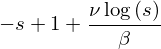

In [62]:
eq = 1-s + nu/beta*log(s)
eq

In [63]:
ssta = solve(eq, s)[0]
ssta.subs({beta:.2, nu:.1})